In [1]:
# 1. Importing Packages and Libraries
!pip install emoji
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.8.2)


In [2]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [4]:
def random_colours(number_of_colors):
  '''
  Simple function for random colours generation.
  Input:
    number_of_colors - integer value indicating the number of colours which are going to be generated.
  Output:
    Color in the following format: ['#SEF54S] '''
  colors = []
  for i in range(number_of_colors):
    colors.append('#'+"".join([random.choice('0123456789ABCDEF')for j in range(6)]))
  return colors


In [5]:
# 2. Reading The Data

In [6]:
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/My Drive/SentimentAnalysisofTweets/TrumpDataset/trumptweets.csv')

In [7]:
train

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN
41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN
41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN
41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN


In [8]:
print(train.shape)

(41122, 9)


In [9]:
# In That We are going to use 27486 tweets as train set and 3535 tweets as a test set.

In [10]:
train.describe()

,id,retweets,favorites,geo
count,4.112200e+04,41122.000000,41122.000000,0.0
mean,6.088909e+17,5455.590657,22356.899105,NaN
std,3.027946e+17,10130.076661,41501.859711,NaN
min,1.698309e+09,0.000000,0.000000,NaN
25%,3.549428e+17,25.000000,28.000000,NaN
50%,5.609149e+17,291.000000,247.000000,NaN
75%,7.941218e+17,8778.000000,32970.750000,NaN
max,1.219077e+18,309892.000000,857678.000000,NaN


In [11]:
train.isna().sum()

# Geo column has all values as nulls, hashtagss have lot of null values, mentions also have lot of null values.

id               0
link             0
content          0
date             0
retweets         0
favorites        0
mentions     18655
hashtags     35312
geo          41122
dtype: int64

In [12]:
# 3. Handling null values

In [13]:
train['hashtags'].unique()

array([nan, '#', '#1', '# #', '#1 #', '# #1', '#01 #', '# #01', '# #Miss',
       '#10', '#103', '#2', '# # #', '#2013', '#3', '#CPAC2013', '#2016',
       '#19', '#for #', '# # # # #', '#9', '#sthash', '#2016 #',
       '# # # #', '# #2016', '#Oscars', '#2 #1', '#by', '# #2016 #',
       '#keepfighting #PresidentTrump', '#NothingWrongWithThat', '#No #',
       '#Donald', '# #sp', '#ixzz38mkekMMd', '#ixzz39oaWl9uE', '#sp',
       '#ixzz3EinGXgfV', '#TrumpForPresident', '#empirebuilding #',
       '#ixzz3FTIqRA2i', '#comments', '#12 #', '#ixzz3HY6z7b8R',
       '#disqus_thread', '#ixzz3HdgLJeEa', '#trumpforpresident',
       '#ixzz3I1Wq7WB1', '#t #', '#ixzz3IHR8pjc1', '#ixzz3IHQHR1Wf',
       '#ixzz3J3cUHFwI', '#pg29', '#pga', '# #1 #', '#ixzz3Lc3KeGLq',
       '# # #2016 #', '#8 #', '# #2016 # # # # # #', '#ixzz3Nn4nJGET',
       '# # # # # # #', '# # #1 #1', '#ixzz3OGoWg0rh', '#239016885',
       '#ixzz3P0Lgk7Io', '#emHE2Xd0wJ6tx2kl', '#RIVERS', '#storylink',
       '#56821933', '# # 

In [14]:
train['mentions'].unique()

array([nan, '@', '@9pm', ..., '@ @Jason2CD @ @', '@FEMA_Brock @ @',
       '@JennaEllisRives'], dtype=object)

In [15]:
# Hashtags: This column does not have something very significant for us to analyse. We have mostly words like #ixzz4 etc which make no sense and we wont be able to analyse their sentiment. So we can get rid of this column.
# Mentions: too does not have anything significant for us to analyse. Hence we can do away with that too. Let us drop columns which dont have any significantly useful information.
# Geo: Anyways does not have any value, all values are null
# Mentions: Usually mention other person and we wont really get any sentiment by analysing that

In [16]:
train = train.drop(['link','mentions','hashtags','geo'],axis=1) # Here axis=0 means remove row or axis=1 means remove column


In [17]:
# 4. EDA: Exploratory Data Analysis

In [18]:
train.head()

,id,content,date,retweets,favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965


In [19]:
# Let's look at the distribution of reviews in the train set

In [20]:
# 5. Cleaning the data

# Let's first clean the data, remove stopwords etc and perform basic preprocessing

In [21]:
# Removing weird spaces
def remove_spaces(text):
  text = text.strip()
  text = text.split()
  return " ".join(text)

In [22]:
# Spelling Correction
def edits1(word):
  letters = 'abcdefghijklmnopqrstuvwxyz'
  splits = [(word[:i],word[i:]) for i in range(len(word)+1)]
  deletes = [L+R[1:] for L, R in splits if R]
  transposes = [L+R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
  replaces = [L+c+R[1:] for L, R in splits if R for c in letters]
  inserts = [L+c+R for L,R in splits for c in letters]
  return set(deletes + transposes + replaces + inserts)

def edits2(word):
  return(e2 for e1 in edits1(word) for e2 in edits1(e1))


In [23]:
# Contraction
contraction = {'cause':'because',
               'aint':'am not',
               'aren\'t': 'are not'}
def mapping_replacer(x,dic):
  for words in dic.keys():
    if ' ' + words + ' ' in x:
      x = x.replace(' '+ words +' ', ' '+dic[words]+' ' )
  return x

In [24]:
# Stemming, lemmatisation and tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer

nltk.LancasterStemmer
ls = LancasterStemmer()
lem = WordNetLemmatizer()

def lexicon_normalization(text):
  words = word_tokenize(text)

  # 1 - stemming
  words_stem = [ls.stem(w) for w in words]

  # 2 - Lemmatization
  words_lem = [lem.lemmatize(w) for w in words_stem]
  return words_lem
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
# Handling emojis
import emoji
import re
# from emot.emo_unicode import UNICODE_EMO
def convert_emojis(text):
  for emot in emoji.UNICODE_EMOJI:
    text = re.sub(r'('+emot+')', "_".join(emoji.UNICODE_EMOJI)[emot].replace(",","").replace(":","").split(), text)
  return text

In [26]:
# Removing links, brackets, numbers, punctuations etc..
def clean_text(text):
  """
    Make text lowercase, remove text in 
    square brackets, remove links,
    remove punctuation and remove
    words containing numbers. 
  """
  text = str(text).lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+','',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text = re.sub('\n','',text)
  text = re.sub('\w*\d\w*','',text)
  text = re.sub('\'','',text)

  return text

In [27]:
# Handling stopwords
from collections import Counter
def remove_stopword(text):
  stop_words = stopwords.words('english')
  stopwords_dict = Counter(stop_words)
  text = ' '.join([word for word in text.split() if word not in stopwords_dict])
  return text

In [28]:
# Tokenization
def tokenise(text):
  words = word_tokenize(text)
  return words

In [29]:
# 6. Applying data cleaning steps to data 

In [30]:
# Cleaning regex expressions from data
import re
train['content'] = train['content'].map(lambda x: re.sub(r'\W+',' ',x))
train['content'] = train['content'].replace(r'\W+',' ',regex=True)

In [31]:
train.head()

,id,content,date,retweets,favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,1741160716,New Blog Post Celebrity Apprentice Finale and ...,2009-05-08 22:40:15,11,24
4,1773561338,My persona will never be that of a wallflower...,2009-05-12 16:07:28,1399,1965


In [32]:
train['content'] = train['content'].apply(lambda x: mapping_replacer(x,contraction))

In [33]:
train['content'] = train['content'].apply(lambda x: clean_text(x))

In [34]:
train['content'] = train['content'].apply(lambda x: remove_stopword(x))

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [36]:
train['content'] = train['content'].apply(lambda x: lexicon_normalization(x))

In [37]:
train.head()

,id,content,date,retweets,favorites
0,1698308935,"[sur, tun, watch, donald, trump, lat, night, d...",2009-05-04 20:54:25,500,868
1,1701461182,"[donald, trump, appear, view, tomorrow, morn, ...",2009-05-05 03:00:10,33,273
2,1737479987,"[donald, trump, read, top, ten, fin, tip, lat,...",2009-05-08 15:38:08,12,18
3,1741160716,"[new, blog, post, celebr, appr, fin, lesson, l...",2009-05-08 22:40:15,11,24
4,1773561338,"[person, nev, wallflow, rath, build, wal, clin...",2009-05-12 16:07:28,1399,1965


In [38]:
# 7. Finding the most common words in out Text

In [39]:
top = Counter([item for sublist in train['content'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap="Greens")

,Common_words,count
0,realdonaldtrump,8741
1,com,8422
2,http,7138
3,trump,6472
4,gre,6444
5,thank,5134
6,twit,4770
7,u,3849
8,presid,3481
9,new,3268


In [40]:
blacklist = ['http','https','www','com','ev','u','ly','pic','would']

def remove_words(text):
  text = [i for i in text if (i not in blacklist)]
  return text

In [41]:
train['content'] = train['content'].apply(lambda x:[i for i in x if i not in blacklist])

In [42]:
fig = px.bar(temp, x='count', y='Common_words',title='Common Words in Selected Text',orientation='h',width=700,height=700,color='Common_words')
fig.show()

In [43]:
top = Counter([item for sublist in train['content'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

,Common_words,count
1,trump,6472
2,gre,6444
3,thank,5134
4,twit,4770
5,presid,3481
6,new,3268
7,stat,2864
8,peopl,2526
9,get,2487
10,donald,2334


In [44]:
# fig = px.treemap(temp,ids='Common_words',values='count', title='Tree of Most Common Words')
# fig.show()

In [45]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [46]:
# 8. Finding Most common words Sentiments Wise

In [47]:
# Let's look at most common words in different sentiments
# 8.1: Finding the tweet sentiment

In [48]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

def get_tweet_setiment(tweet):
  """
    Utility function to classify sentiment of passed tweet using textblob's sentiment method
  """
  # Create TextBlob object of passed tweet text
  analysis = TextBlob(tweet)

  # Set sentiment
  if analysis.sentiment.polarity > 0:
    return 'positive'
  elif analysis.sentiment.polarity == 0:
    return 'neutral'
  else:
    return 'negative'

In [49]:
train['sentiment'] = train['content'].apply(lambda x: get_tweet_setiment(" ".join(x)))
train.head()

,id,content,date,retweets,favorites,sentiment
0,1698308935,"[sur, tun, watch, donald, trump, lat, night, d...",2009-05-04 20:54:25,500,868,positive
1,1701461182,"[donald, trump, appear, view, tomorrow, morn, ...",2009-05-05 03:00:10,33,273,positive
2,1737479987,"[donald, trump, read, top, ten, fin, tip, lat,...",2009-05-08 15:38:08,12,18,positive
3,1741160716,"[new, blog, post, celebr, appr, fin, lesson, l...",2009-05-08 22:40:15,11,24,positive
4,1773561338,"[person, nev, wallflow, rath, build, wal, clin...",2009-05-12 16:07:28,1399,1965,neutral


In [50]:
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

In [51]:
# Overall tweet sentiments
print('Number of tweets with positive sentiment', Positive_sent['sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral_sent['sentiment'].count())

Number of tweets with positive sentiment 15069
Number of tweets with negative sentiment 6756
Number of tweets with neutral sentiment 19297


In [52]:
# 8.2: Finding common words for positive sentiment tweets

In [53]:
# Most common positive words
top = Counter([item for sublist in Positive_sent['content'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,realdonaldtrump,3011
1,gre,2651
2,new,2650
3,trump,2637
4,good,1593
5,thank,1563
6,win,1409
7,presid,1360
8,real,1304
9,twit,1170


In [54]:
# Since we have words like 's', 'gre' or many more which do not really mean anything, we will remove them and find the most common words.

In [60]:
import numpy as np 
top = Counter([item for sublist in Positive_sent['content'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(23))
temp_positive.columns = ['Common_words','count']
temp_positive['Common_words'] = temp_positive['Common_words'].map(lambda x: re.sub(r'\W+','',x))
temp_positive['Common_words'] = temp_positive['Common_words'].replace(r'\W+','',regex=True)
temp_positive['Common_words'] = temp_positive['Common_words'].apply(lambda x: remove_spaces(x))
temp_positive = temp_positive[~temp_positive['Common_words'].isin(['s','gre','"',' * '])] # New line removing meaningless words
mask1 = temp_positive.Common_words.str.contains('[a-zA-Z]')
mask2 = temp_positive.Common_words.notna()
temp_positive = temp_positive[mask1 | mask2]
temp_positive.Common_words = temp_positive.Common_words.str.replace(r"\s+","").replace("",np.NaN)
temp_positive = temp_positive.dropna()

temp_positive.style.background_gradient(cmap = 'Greens')

,Common_words,count
0,realdonaldtrump,3011
2,new,2650
3,trump,2637
4,good,1593
5,thank,1563
6,win,1409
7,presid,1360
8,real,1304
9,twit,1170
10,peopl,1141


In [61]:
# Most Common Words in Positive Sentiment Tweets
fig = px.bar(temp_positive,x='count',y='Common_words', title='Most Common Words in Positive Sentiment Tweets', orientation='h',width=700,height=700,color='Common_words')

fig.show()


In [62]:
# 8.3 : Find Common Words for Negative Sentiment tweets
#MosT common negative words
top = Counter([item for sublist in Negative_sent['content'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,gre,825
2,realdonaldtrump,774
3,trump,751
4,peopl,625
5,new,618
6,mad,614
7,presid,598
8,stat,555
9,get,546
10,fail,540


In [64]:

#MosT common negative words
top = Counter([item for sublist in Negative_sent['content'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(22))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']

#Data cleaning
temp_negative['Common_words'] = temp_negative['Common_words'].map(lambda x: re.sub(r'\W+', '', x))
temp_negative['Common_words'] = temp_negative['Common_words'].replace(r'\W+', '', regex=True)
temp_negative=temp_negative[~temp_negative['Common_words'].isin(['s','t'])] #new line removing meaningless words from above
mask1 = temp_negative.Common_words.str.contains('[a-zA-Z]')
mask2 = temp_negative.Common_words.notna()
temp_negative = temp_negative[mask1 | mask2]

temp_negative.Common_words =  temp_negative.Common_words.replace("", np.nan)
temp_negative = temp_negative.dropna(subset=['Common_words'])

temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,gre,825
2,realdonaldtrump,774
3,trump,751
4,peopl,625
5,new,618
6,mad,614
7,presid,598
8,stat,555
9,get,546
10,fail,540


In [65]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Words in Negative Tweets')
fig.show()

In [66]:
# 8.4: Finding Common words for neutral Sentiment tweets
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['content'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,thank,3276
2,twit,3221
3,trump,3084
4,gre,2968
5,presid,1523
6,stat,1286
7,donald,1213
8,bit,1090
9,mak,914
10,americ,900


In [67]:
top = Counter([item for sublist in Neutral_sent['content'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']

#Data cleaning
temp_neutral['Common_words'] = temp_neutral['Common_words'].map(lambda x: re.sub(r'\W+', '', x))
temp_neutral['Common_words'] = temp_neutral['Common_words'].replace(r'\W+', '', regex=True)
temp_neutral=temp_neutral[~temp_neutral['Common_words'].isin(['s'])] #new line removing meaningless words from above

temp_neutral.Common_words =  temp_neutral.Common_words.replace("", np.nan)
temp_neutral = temp_neutral.dropna(subset=['Common_words'])

temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,thank,3276
2,twit,3221
3,trump,3084
4,gre,2968
5,presid,1523
6,stat,1286
7,donald,1213
8,bit,1090
9,mak,914
10,americ,900


In [68]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [69]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

In [70]:
# 9. Number of Unique Words in tweets of each type of Sentiment

# We will look at number of unique words in each type of tweet with different sentiments:
# Positive, Negative, Neutral

In [71]:
raw_text = [word for word_list in train['content'] for word in word_list]


In [74]:
# Function to find unique words
def words_unique(sentiment,numwords,raw_words):
  '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
  allother = []
  for item in train[train.sentiment != sentiment]['content']:
    for word in item:
      allother.append(word)
  allother = list(set(allother))
  specificnonly = [x for x in raw_text if x not in allother]

  mycounter = Counter()
  for item in train[train.sentiment == sentiment]['content']:
    for word in item:
      mycounter[word] += 1
  keep = list(specificnonly)

  for word in list(mycounter):
    if word not in keep:
      del mycounter[word]
  
  Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns=['words','count'])
  return Unique_words

In [75]:
# 9.1: Number of unique words in tweets with positive sentiment

In [76]:
Unique_Positive = words_unique('positive',20,raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,okay,16
1,sweet,14
2,joy,12
3,loyal,11
4,superb,10
5,dim,9
6,toyot,9
7,free,8
8,orl,8
9,woody,7


In [77]:
Unique_Positive

,words,count
0,okay,16
1,sweet,14
2,joy,12
3,loyal,11
4,superb,10
5,dim,9
6,toyot,9
7,free,8
8,orl,8
9,woody,7


In [78]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Words in Positive sentiment tweets')
fig.show()

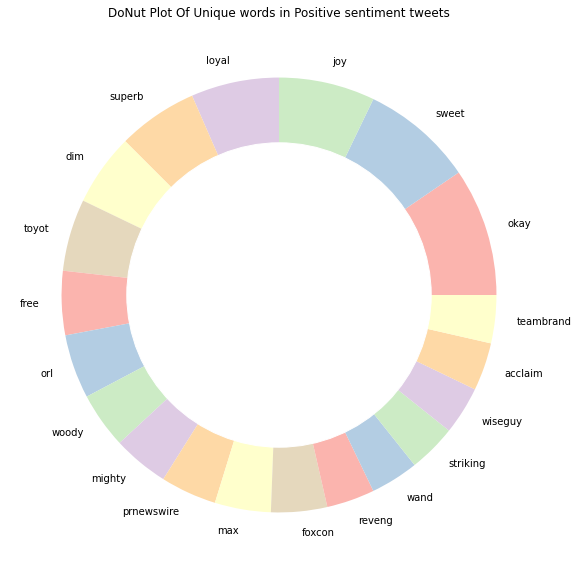

In [79]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique words in Positive sentiment tweets')
plt.show()

In [80]:
# 9.2: Number of unique words in tweets with negative sentiment

In [81]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,blind,20
1,filthy,12
2,crap,11
3,weird,8
4,tempera,6
5,grief,6
6,puppy,5
7,refut,5
8,nadarkhan,4
9,blockbust,4


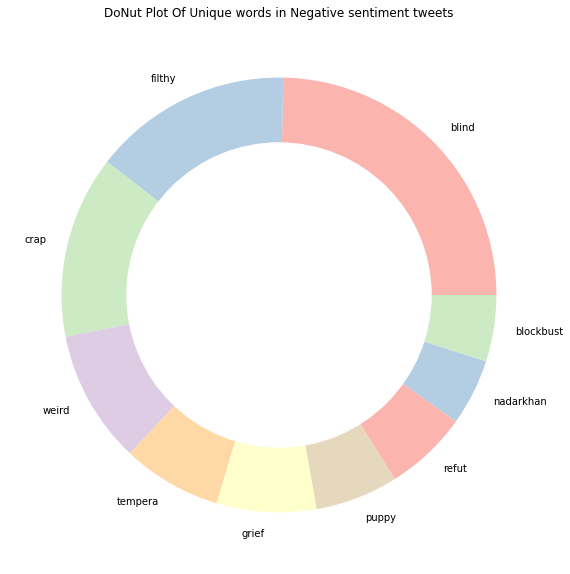

In [82]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique words in Negative sentiment tweets')
plt.show()

In [83]:
# 9.3: Number of unique words in tweets with neutral sentiments

In [84]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


,words,count
0,به,13
1,algemein,12
2,را,12
3,luv,11
4,ایران,10
5,wilmington,9
6,و,9
7,mason,8
8,premierecollect,8
9,roanok,8


In [86]:
# Since the count for positive, negative and neutral sentiments is so less, there is no use of creating word clouds with unique words. So we will create a wordcloud with all the words combined.

In [87]:
# Data cleaning
Unique_Neutral= words_unique('neutral', 14, raw_text)
Unique_Neutral['words'] = Unique_Neutral['words'].map(lambda x: re.sub(r'\W+', '', x))
Unique_Neutral['words'] = Unique_Neutral['words'].replace(r'\W+', '', regex=True)
Unique_Neutral['words']=Unique_Neutral[~Unique_Neutral['words'].isin(['به','را','ایران','و'])] #new line removing meaningless words from above

Unique_Neutral['words'] =  Unique_Neutral['words'].replace("", np.nan)
Unique_Neutral= Unique_Neutral.dropna(subset=['words'])

Unique_Neutral.style.background_gradient(cmap='Reds')

,words,count
1,algemein,12
3,luv,11
5,wilmington,9
7,mason,8
8,premierecollect,8
9,roanok,8
10,jobsnotmob,8
11,autograph,7
12,thomasarobert,7
13,lauderd,7


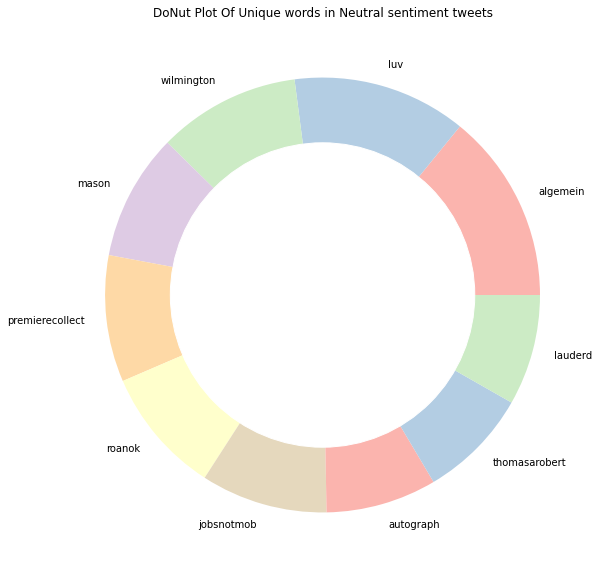

In [88]:
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique words in Neutral sentiment tweets')
plt.show()

In [90]:
'''
By Looking at the Unique Words of each sentiment,we now have much more clarity about the data

We shall now proceed to create word clouds, but we shall make word cloud of all words and not just existing words since unique words are very less in number for many sentiments (10,7,9 etc.) , so an effective word cloud can be only made by considering all the words in different sentiment tweets
'''

'\nBy Looking at the Unique Words of each sentiment,we now have much more clarity about the data\n\nWe shall now proceed to create word clouds, but we shall make word cloud of all words and not just existing words since unique words are very less in number for many sentiments (10,7,9 etc.) , so an effective word cloud can be only made by considering all the words in different sentiment tweets\n'

In [91]:
# 10: WordClouds
# We will be building three types of Wordclouds:
# ->Positive Tweets, Negative Tweets or Neutral Tweets

In [92]:
# Function to plot a wordcloud
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0),color='white',title=None,title_size=40,image_color=False):
  wordcloud = WordCloud(background_color=color,
                        max_words=max_words,
                        max_font_size=max_font_size,
                        random_state=42,
                        width=400,
                        height=200,
                        mask=mask)
  wordcloud.generate(str(text))

  plt.figure(figsize=figure_size)
  if image_color:
    image_colors = ImageColorGenerator(mask)
    plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
    plt.title(title, fontdict={'size': title_size, 'verticalalignment': 'bottom'})
  else:
    plt.imshow(wordcloud)
    plt.title(title, fontdict={'size':title_size, 'color':'black','verticalalignment':'bottom'})
    plt.axis('off')
    plt.tight_layout()
  # d = '/kaggle/input/trump-tweets/'

In [93]:
# 10.1 : WordCloud for neutral sentiment

In [94]:
Neutral_sent

,id,content,date,retweets,favorites,sentiment
4,1773561338,"[person, nev, wallflow, rath, build, wal, clin...",2009-05-12 16:07:28,1399,1965,neutral
5,1776419923,"[miss, tar, con, fir, alway, believ, second, c...",2009-05-12 21:21:55,27,26,neutral
7,1796477499,"[strive, whol, keep, sen, wond, intact, donald...",2009-05-14 18:30:40,18,25,neutral
8,1806258917,"[ent, think, lik, champ, sign, book, keychain,...",2009-05-15 16:13:13,14,8,neutral
9,1820624395,"[achiev, achiev, plateau, begin, donald, j, tr...",2009-05-17 00:22:45,20,48,neutral
...,...,...,...,...,...,...
41104,1218520880051105792,"[gre, day, whit, hous, nat, champ, lsu, tig, t...",2020-01-18 14:09:51,18014,99669,neutral
41108,1218668469597675520,"[approv, rat, republ, party, record, thank]",2020-01-18 23:56:19,22241,133899,neutral
41110,1218673508911403008,"[anoth, fak, book, two, third, rat, washington...",2020-01-19 00:16:21,22674,112349,neutral
41115,1218752661471793153,[twit],2020-01-19 05:30:52,20302,66943,neutral


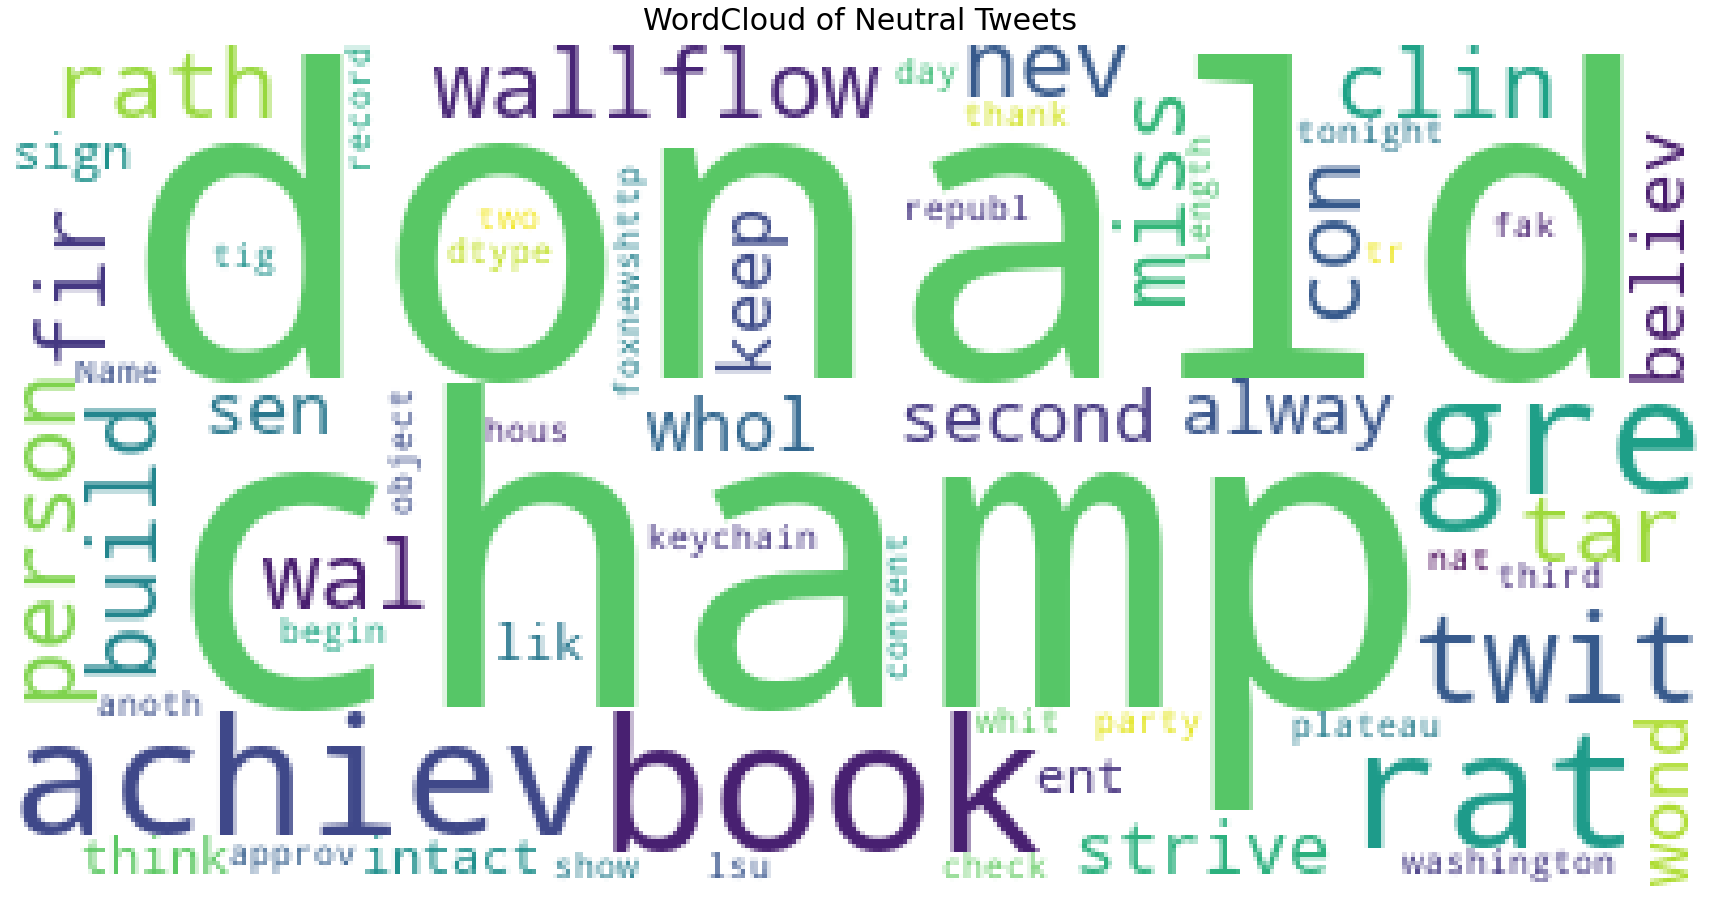

In [95]:
plot_wordcloud(Neutral_sent.content,color='white',max_font_size=100,title_size=30,title="WordCloud of Neutral Tweets")

In [96]:
# 10.2: WordCloud for positive sentiment 

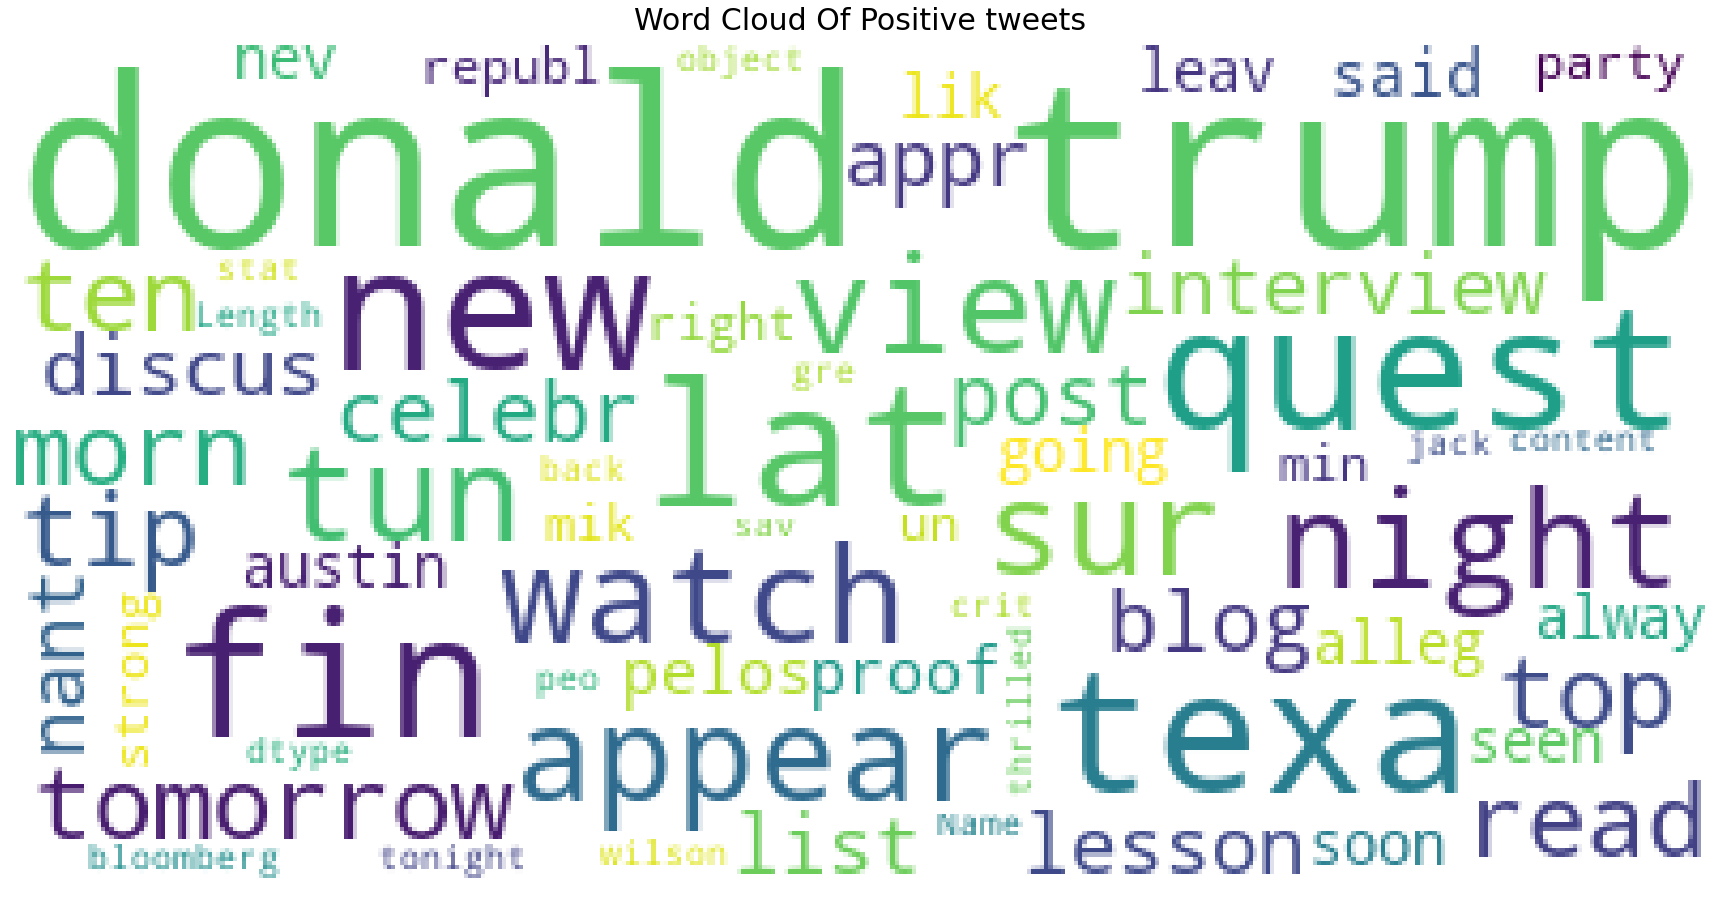

In [100]:
plot_wordcloud(Positive_sent.content,title="Word Cloud Of Positive tweets",title_size=30)

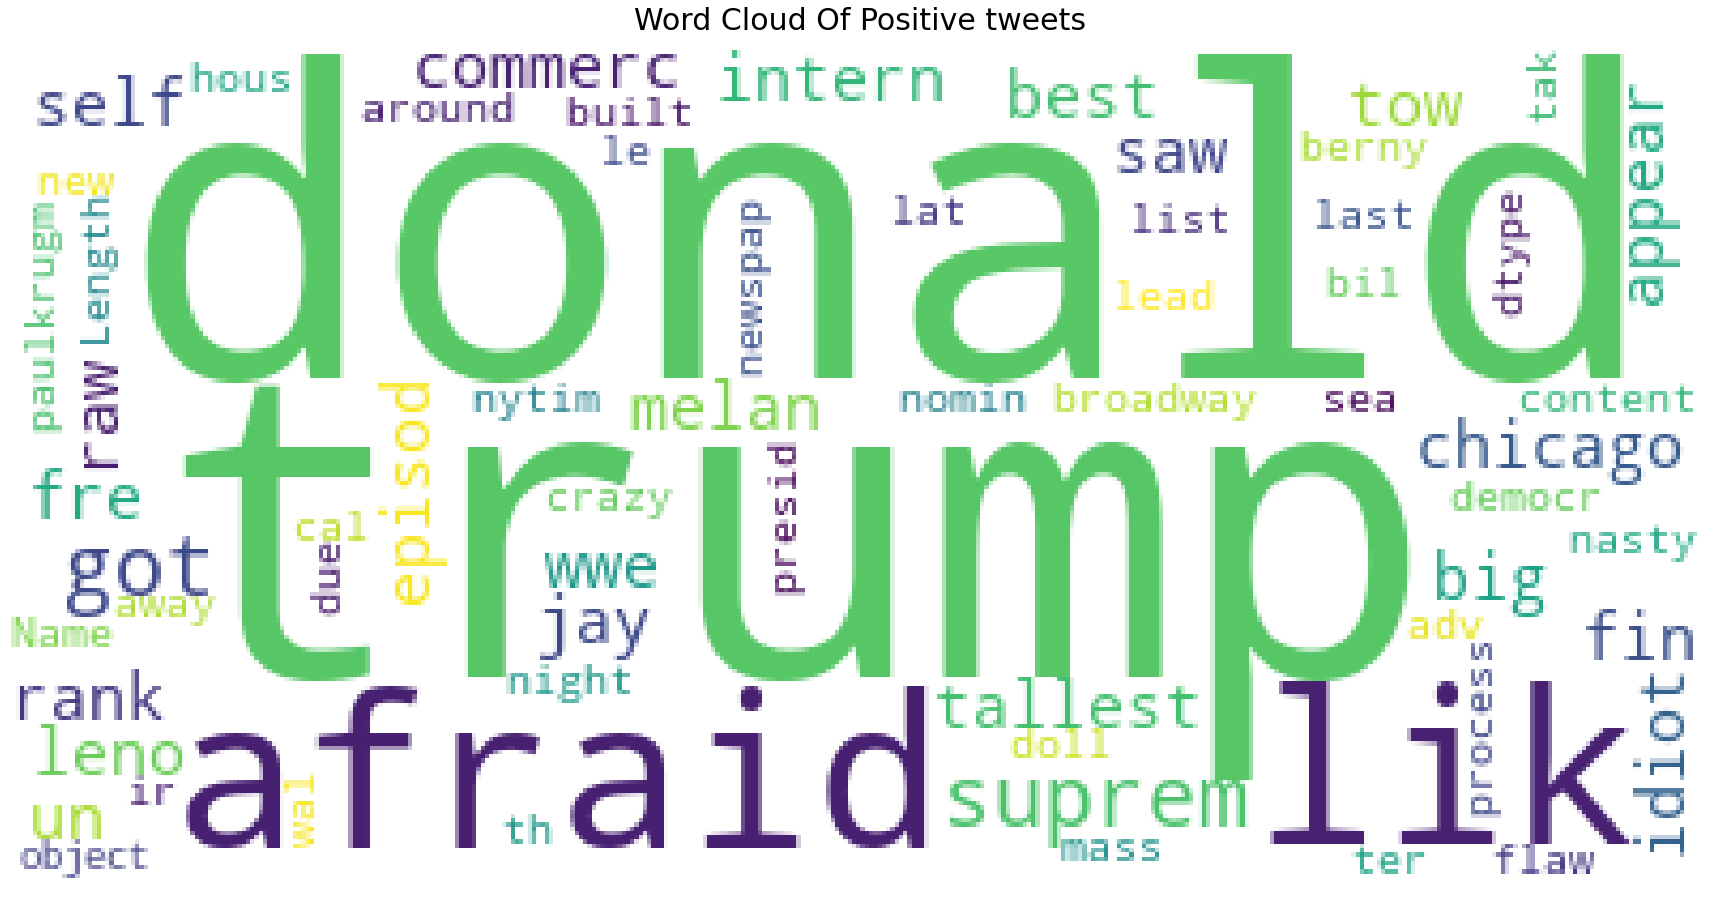

In [99]:
plot_wordcloud(Negative_sent.content,title="Word Cloud Of Positive tweets",title_size=30)